# Курсовая работа по дисциплине "Случайные процессы"

**Выполнил:** Титеев Р.М.

**Группа:** М8О-305Б-21

**Вариант:** 26

## Задание
Сигнал, моделируемый стационарным центрированным гауссовским случайным процессом $\xi(t)$ c ковариационной функцией $R(t)$, подается на вход некоторому линейному стационарному преобразованию. СФ $\varepsilon(t)$ задает шум в системе. Выходной сигнал это $\eta(t)$. СФ $\xi(t)$, $k(t)$ и $\varepsilon(t)$ независимые и центрированные. Входной и выходной сигналы связаны уравнением:
$$\frac{d\eta(t)}{dt} + 4 = k(t) \cdot \xi(t) + \varepsilon(t)$$

Входной сигнал $\xi(t)$ имеет ковариационную функцию
$$R(\tau) = 2e^{-3|\tau|}$$

Процесс $k(t)$ описывается следующим образом: $k(t) = w(t+5) - w(t)$, где $w(t)$ - стандартный винеровский процесс.

Шум в системе $\varepsilon(t)$: 
\begin{equation*}
S_{\varepsilon}(\lambda) = 
 \begin{cases}
   1, &\text{|$\lambda$| < 1}\\
   0, &\text{в пр. сл.}
 \end{cases}
 = \theta(1 - |\lambda|)
\end{equation*}


Для выходного сигнала $\eta(t)$ найдите:
1. спектральную плотность;
2. ковариационную функцию;
3. дисперсию.

Докажите, что правая часть системы (1) представляет собой стацинарный процесс. Также постройте графики, найденных характеристик.

## Решение

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Спектральная плотность $\eta(t)$

Для нахождения спектральной плотности $\eta(t)$ воспользуемся формулой:

$ s_{\eta}(\lambda) = |H(\lambda)|^2 \cdot s_{r}(\lambda)$,\
где $|H(\lambda)|$ - спектральная характеристика, $s_{r}(\lambda)$ - спектральная плотность линейного преобразования входного процесса

Процесс $r(t)$ опишем как: \
$r(t) = k(t) \cdot \xi(t) + \varepsilon(t)$

#### 1.1 Ковариационная функция $k(t) = w(t+5) - w(t)$

$$R_{k} = Cov(w(t + 5) - w(t), w(s + 5) - w(s)) = Cov(w(t+5), w(s+5)-w(s)) - Cov(w(t), w(s+5)-w(s)) = $$
$$Cov(w(t + 5), w(s + 5)) - Cov(w(t+5), w(s)) - Cov(w(t), w(s+5)) + Cov(w(t), w(s)) = $$
$$= \min(t+5, s+5) - \min(t+5, s) - \min(t, s+5) + \min(s, t)$$

Рассмотрим 4 случая:
1. $t < s-5 \Rightarrow t + 5 - t - 5 - t + t = 0 \Rightarrow R_{k} = 0$
2. $s-5 \le t < s \Rightarrow t + 5 - s - t + t = 0 \Rightarrow R_{k} = t - s + 5$
1. $s \le t < s+5 \Rightarrow s + 5 - s - t + s = 0 \Rightarrow R_{k} = s - t + 5$
1. $s+5 \le t \Rightarrow s + 5 - s - s - 5 + s = 0 \Rightarrow R_{k} = 0$

Введем замену $\tau = t - s$, тогда:
\begin{equation*}
R_k(\tau) = 
 \begin{cases}
   5 - |\tau|, &|\tau| < 5\\
   0, &\text{в пр. сл.}
 \end{cases}
 = (5 - |\tau|)\theta(5 - |\tau|)
\end{equation*} 

#### 1.2 Ковариационная функция шума $\varepsilon(t)$: 

$R_{\varepsilon}(\tau) = \int_{-\infty}^{+\infty} \theta(1-|\lambda|)\; e^{i\lambda \tau}\; d\lambda = \int_{-1}^{1} e^{i\lambda \tau}\; d\lambda = \frac{e^{i \tau} - e^{-i \tau}}{i \tau} = \frac{\sin(\tau)}{\tau}$

#### 1.3 Ковариационная функция $r(t) = k(t) \cdot \xi(t) + \varepsilon(t)$

$$R_r = Cov(r(t),r(s)) = M[(r(t)-M[r(t)])\cdot(r(s)-M[r(s)])]=$$
$$=M[(k(t) \xi(t) + \varepsilon(t) - M[k(t) \xi(t) + \varepsilon(t)]) \cdot (k(s) \xi(s) + \varepsilon(s) - M[k(s) \xi(s) + \varepsilon(s)])]$$

В силу независимости процессов получаем:
$$R_r = M[(k(t) \xi(t) + \varepsilon(t) - M[k(t)] M[\xi(t)] - M[\varepsilon(t)]) \cdot (k(s) \xi(s) + \varepsilon(s) - M[k(s)] M[\xi(s)] - M[\varepsilon(s)])]$$

Рассмотрим $M[k(t)]$ и $M[\varepsilon(t)]$:

$M[k(t)] = M[w(t+5) - w(t)] = M[w(t+5)] - M[w(t)] = 0$

$M[\varepsilon(t)]$ = 0 (т.к. она центрированная)

Следовательно получаем:
$$R_r = M[(k(t) \xi(t) + \varepsilon(t)) \cdot (k(s) \xi(s) + \varepsilon(s))] = $$
$$= M[k(t) \xi(t) k(s) \xi(s) + k(s) \xi(s) \varepsilon(t) + k(t) \xi(t) \varepsilon(s) + \varepsilon(t) \varepsilon(s)] = $$
$$= M[k(t) k(s)] \cdot M[\xi(t) \xi(s)] + M[\varepsilon(t) \varepsilon(s)]$$

Т.к.
1) $M[k(t)k(s)] = Cov(k(t), k(s)) = R_k(\tau)$
2) $M[\xi(t)\xi(s)] = Cov(\xi(t), \xi(s)) = R_{\xi}(\tau) = R(\tau)$
3) $M[\varepsilon(t)\varepsilon(s)] = Cov(\varepsilon(t), \varepsilon(s)) = R_{\varepsilon}(\tau)$

Получаем следующее выражение:
$$R_r(\tau) = R_k(\tau)R(\tau) + R_{\varepsilon}(\tau)$$

Таким образом, подставляя найденные ранее ковариационные функции получаем:
$$R_r(\tau) = 2e^{-3|\tau|}(5 - |\tau|)\theta(5 - |\tau|) + \frac{\sin(\tau)}{\tau}$$

#### 1.4 Спектральная плотность процесса $r(t)$

Для поиска спектральной плотности воспользуемся преобразованием Фурье ковариационной функции:
$$s_{r}(\lambda) = \frac{1}{2\pi} \int_{-\infty}^{\infty} R_r(\tau) \cdot e^{-i\tau \lambda}\; d\tau = 
\frac{1}{2\pi} \int_{-\infty}^{\infty} (2e^{-3|\tau|}(5 - |\tau|)\theta(5 - |\tau|) + \frac{\sin(\tau)}{\tau}) \cdot e^{-i\tau \lambda}\; d\tau = $$

$$ \frac{1}{2\pi} \left( 2\int_{-5}^{5} e^{-3|\tau|-i\tau \lambda}(5 - |\tau|)\; d\tau + 
\int_{-\infty}^{\infty} \frac{\sin(\tau)}{\tau}\cdot e^{-i\tau \lambda}\; d\tau \right)$$


##### 1.4.1 Расчитаем первое слагаемое $F_1$
$$ F_1 = \int_{-5}^{5} 2e^{-3|\tau|-i\tau \lambda}(5 - |\tau|)\; d\tau = $$

$$ = \frac{5e^{-15-5i\lambda}(e^{10i\lambda}(-3 - i\lambda) + 6e^{15+5i\lambda} + i\lambda - 3)}
{\lambda^2 + 9} - $$
$$ - \frac{e^{-15-5i\lambda}(-2e^{15+5i\lambda}(\lambda^2 - 9) + e^{10i\lambda}(16 - 5i\lambda)(\lambda - 3i)^2 + (16 + 5i\lambda)(\lambda + 3i)^2)}
{(\lambda^2 + 9)^2} = $$

$$= \frac{10(\lambda\sin(5\lambda)-3\cos(5\lambda) + 3e^{15})}{e^{15}(\lambda^2 + 9)}
- \frac{-2e^ {15}(t^ {2}-9)+2t(5t^ {2}+51)\sin (5t)-4(7t^ {2}+72)\cos (5t)}{e^{15}(\lambda^2 + 9)^2} $$

##### 1.4.2 Расчитаем второе слагаемое $F_2$

$$F_2 = \int_{-\infty}^{\infty} \frac{\sin(\tau)}{\tau}\cdot e^{-i\tau \lambda}\; d\tau = 
\sqrt{\frac{\pi}{8}}(sgn(1-\lambda)+sgn(1 + \lambda)) = \sqrt{\frac{\pi}{2}} \theta(1-|\lambda|)$$

Финальный результат спектральной плотности для правой части получается следующий:

$$
s_{r}(\lambda) = \frac{1}{2\pi} \left( 
\frac{20(\lambda\sin(5\lambda)-3\cos(5\lambda) + 3e^{15})}{e^{15}(\lambda^2 + 9)}
- \frac{-4e^ {15}(t^ {2}-9)+2t(5t^ {2}+51)\sin (5t)-4(7t^ {2}+72)\cos (5t)}{e^{15}(\lambda^2 + 9)^2} + 
\sqrt{\frac{\pi}{2}} \theta(1-|\lambda|) 
\right)
$$

#### 1.5 Спектральная плотность процесса $\eta(t)$

Для расчета спектрально плотности найдем частотную характеристику:

1. $P(\frac{d}{dt})\eta(t) = Q(\frac{d}{dt})r(t)$
2. $P(z) = z, Q(z) = 1$
3. $H(\lambda) = \frac{Q(i\lambda)}{p(i\lambda)} = \frac{1}{i\lambda}$

Подставим найденные значения в формулу:

$$s_{\eta}(\lambda) = |H(\lambda)|^2 \cdot s_{r}(\lambda) = \frac{1}{2\pi\lambda^2} \left( 
\frac{20(\lambda\sin(5\lambda)-3\cos(5\lambda) + 3e^{15})}{e^{15}(\lambda^2 + 9)}
- \frac{-4e^ {15}(\lambda^ {2}-9)+2\lambda(5\lambda^ {2}+51)\sin (5\lambda)-4(7\lambda^ {2}+72)\cos (5\lambda)}{e^{15}(\lambda^2 + 9)^2} + 
\sqrt{\frac{\pi}{2}} \theta(1-|\lambda|) 
\right)$$

### 2. Ковариационная функция $\eta(t)$

Для нахождения ковариацонной функции воспользумся обратным преобразованием Фурье:

$$R_\eta(\tau) = \int_{-\infty}^{\infty} s_\eta(\tau)\ e^{i \tau \lambda} d\lambda = $$
$$ = \frac{1}{2\pi} \int_{-\infty}^{\infty} \left(
\frac{20(\lambda\sin(5\lambda)-3\cos(5\lambda) + 3e^{15})}{e^{15}\lambda^2(\lambda^2 + 9)}
- \frac{-4e^ {15}(\lambda^ {2}-9)+2\lambda(5\lambda^ {2}+51)\sin (5\lambda)-4(7\lambda^ {2}+72)\cos (5\lambda)}{e^{15}\lambda^2(\lambda^2 + 9)^2} +
\sqrt{\frac{\pi}{2}} \frac{\theta(1-|\lambda|)}{\lambda^2} 
\right)e^{i \tau \lambda}
d\lambda$$



#### 2.1 Расчитаем первое слагаемое $n_1$

$$\frac{20}{2e^{15}\pi} \int_{-\infty}^{\infty} 
\left( 
\frac{\lambda\sin(5\lambda)-3\cos(5\lambda) + 3e^{15}}{\lambda^2(\lambda^2 + 9)}
\right)e^{i \tau \lambda}
d\lambda$$

Разобьем данный интеграл на слагаемые:

$$\frac{20}{2e^{15}\pi} \left ( \int_{-\infty}^{\infty} 
\frac{\sin(5\lambda)e^{i \tau \lambda}}{\lambda(\lambda^2 + 9)} 
d\lambda -
\int_{-\infty}^{\infty} 
\frac{3\cos(5\lambda)e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)} 
d\lambda + 
\int_{-\infty}^{\infty} 
\frac{3e^{15}e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)} 
d\lambda
\right )
$$

Поделив на слагаемые, получаем

##### 2.1.1 Первое слагаемое:

Интеграл $\int_{-\infty}^{\infty} \frac{\sin(5\lambda)e^{i \tau \lambda}}{\lambda(\lambda^2 + 9)} d\lambda$ имеет следующие особные точки:
1. $\lambda_1 = 0$ (1-го порядка)
2. $\lambda_2 = -3i$ (1-го порядка)
3. $\lambda_3 = 3i$ (1-го порядка)

$$
Res_{\lambda = \lambda_1}\left(\frac{\sin(5\lambda)e^{i \tau \lambda}}{\lambda(\lambda^2 + 9)}\right) = 0
$$

$$
Res_{\lambda = \lambda_2}\left(\frac{\sin(5\lambda)e^{i \tau \lambda}}{\lambda(\lambda^2 + 9)}\right) = 
-\frac{i\sh(15)e^{3\tau}}{18}
$$

$$
Res_{\lambda = \lambda_3}\left(\frac{\sin(5\lambda)e^{i \tau \lambda}}{\lambda(\lambda^2 + 9)}\right) = 
\frac{i\sh(15)e^{-3\tau}}{18}
$$

$$\int_{-\infty}^{\infty} \frac{\sin(5\lambda)e^{i \tau \lambda}}{\lambda(\lambda^2 + 9)} d\lambda =
2\pi i\left(\frac{i\sh(15)e^{-3\tau}}{18} -\frac{i\sh(15)e^{3\tau}}{18}\right)$$

##### 2.1.2 Второе слагаемое:

Интеграл $\int_{-\infty}^{\infty} \frac{3\cos(5\lambda)e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)} d\lambda$ имеет следующие особные точки:
1. $\lambda_1 = 0$ (2-го порядка)
2. $\lambda_2 = -3i$ (1-го порядка)
3. $\lambda_3 = 3i$ (1-го порядка)

$$
Res_{\lambda = \lambda_1}\left(\frac{3\cos(5\lambda)e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)}\right) = \frac{\tau i}{3}
$$

$$
Res_{\lambda = \lambda_2}\left(\frac{3\cos(5\lambda)e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)}\right) = 
-\frac{i\ch(15)e^{3\tau}}{18}
$$

$$
Res_{\lambda = \lambda_3}\left(\frac{3\cos(5\lambda)e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)}\right) = 
\frac{i\ch(15)e^{-3\tau}}{18}
$$

$$\int_{-\infty}^{\infty} \frac{3\cos(5\lambda)e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)} d\lambda =
2\pi i\left(\frac{\tau i}{3} + \frac{i\ch(15)e^{-3\tau}}{18} -\frac{i\ch(15)e^{3\tau}}{18}\right)$$

##### 2.1.2 Третье слагаемое:

Интеграл $\int_{-\infty}^{\infty} \frac{3e^{15}e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)} d\lambda$ имеет следующие особные точки:
1. $\lambda_1 = 0$ (2-го порядка)
2. $\lambda_2 = -3i$ (1-го порядка)
3. $\lambda_3 = 3i$ (1-го порядка)

$$
Res_{\lambda = \lambda_1}\left(\frac{3e^{15}e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)}\right) = \frac{e^{15} \tau i}{3}
$$

$$
Res_{\lambda = \lambda_2}\left(\frac{3e^{15}e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)}\right) = 
-\frac{ie^{15-3\tau}}{18}
$$

$$
Res_{\lambda = \lambda_3}\left(\frac{3e^{15}e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)}\right) = 
\frac{ie^{15+3\tau}}{18}
$$

$$\int_{-\infty}^{\infty} \frac{3e^{15}e^{i \tau \lambda}}{\lambda^2(\lambda^2 + 9)} d\lambda =
2\pi i\left(\frac{e^{15} \tau i}{3} + \frac{ie^{15+3\tau}}{18} -\frac{ie^{15-3\tau}}{18}\right)$$

Из полученых вычислений следует:

$$\frac{20}{2e^{15}\pi} \int_{-\infty}^{\infty} 
\left( 
\frac{\lambda\sin(5\lambda)-3\cos(5\lambda) + 3e^{15}}{\lambda^2(\lambda^2 + 9)}
\right)e^{i \tau \lambda}
d\lambda = $$

$$
= \frac{20}{e^{15}} \left( \frac{-e^{3\tau}}{18}e^{-15} + \frac{e^{-3\tau}}{18}e^{-15} + \frac{\tau}{3} - \frac{\tau e^{15}}{3}
- \frac{e^{15-3\tau}}{18} + \frac{e^{15+3\tau}}{18}
\right)
$$

In [2]:
def n_1(x):
    return (20/(np.exp(15)))*((-np.exp(-15+3*x))/18 + (np.exp(-15-3*x))/18 + x/3 - (x*np.exp(15))/3 - (np.exp(15-3*x))/18 + (np.exp(15-3*x))/18)


#### 2.2 Расчитаем второе слагаемое $n_2$

$$\frac{20}{2e^{15}\pi} \int_{-\infty}^{\infty} 
\left( 
\frac{-4e^ {15}(\lambda^ {2}-9)+2\lambda(5\lambda^ {2}+51)\sin (5\lambda)-4(7\lambda^ {2}+72)\cos (5\lambda)}{e^{15}\lambda^2(\lambda^2 + 9)^2}
\right)e^{i \tau \lambda}
d\lambda$$

Разобьем данный интеграл на слагаемые:

$$\frac{20}{2e^{15}\pi}\left( 
- \int_{-\infty}^{\infty}
\frac{4(\lambda^ {2}-9)e^{i \tau \lambda} }{\lambda^2(\lambda^2 + 9)^2} d\lambda+ 
\int_{-\infty}^{\infty}
\frac{2(5\lambda^ {2}+51)\sin (5\lambda)e^{i \tau \lambda}}{e^{15}\lambda(\lambda^2 + 9)^2} d\lambda -
\int_{-\infty}^{\infty} 
\frac{4(7\lambda^ {2}+72)\cos (5\lambda)e^{i \tau \lambda} }{e^{15}\lambda^2(\lambda^2 + 9)^2} d\lambda
\right)
$$

##### 2.2.1 Первое слагаемое:

Интеграл $\int_{-\infty}^{\infty} \frac{4(\lambda^ {2}-9)e^{i \tau \lambda} }{\lambda^2(\lambda^2 + 9)^2} d\lambda$ имеет следующие особные точки:
1. $\lambda_1 = 0$ (2-го порядка)
2. $\lambda_2 = -3i$ (2-го порядка)
3. $\lambda_3 = 3i$ (2-го порядка)

$$
Res_{\lambda = \lambda_1}\left(\frac{4(\lambda^ {2}-9)e^{i \tau \lambda} }{\lambda^2(\lambda^2 + 9)^2}\right) = 
\frac{-4i\tau e^{15}}{9}
$$

$$
Res_{\lambda = \lambda_2}\left(\frac{4(\lambda^ {2}-9)e^{i \tau \lambda} }{\lambda^2(\lambda^2 + 9)^2}\right) = 
\frac{10ie^{15-3\tau}}{27}
$$

$$
Res_{\lambda = \lambda_3}\left(\frac{4(\lambda^ {2}-9)e^{i \tau \lambda} }{\lambda^2(\lambda^2 + 9)^2}\right) = 
\frac{2ie^{15+3\tau}}{27}
$$

$$\int_{-\infty}^{\infty} \frac{4(\lambda^ {2}-9)e^{i \tau \lambda} }{\lambda^2(\lambda^2 + 9)^2} d\lambda =
2\pi i\left(\frac{-4i\tau e^{15}}{9} + \frac{10ie^{15-3\tau}}{27} + \frac{2ie^{15+3\tau}}{27} \right)$$

##### 2.2.2 Второе слагаемое:

Интеграл $\int_{-\infty}^{\infty} \frac{2(5\lambda^ {2}+51)\sin (5\lambda)e^{i \tau \lambda}}{e^{15}\lambda(\lambda^2 + 9)^2} d\lambda$ имеет следующие особные точки:
1. $\lambda_1 = 0$ (1-го порядка)
2. $\lambda_2 = -3i$ (2-го порядка)
3. $\lambda_3 = 3i$ (2-го порядка)

$$
Res_{\lambda = \lambda_1}\left(\frac{2(5\lambda^ {2}+51)\sin (5\lambda)e^{i \tau \lambda}}{e^{15}\lambda(\lambda^2 + 9)^2}\right) = 
0
$$

$$
Res_{\lambda = \lambda_2}\left(\frac{2(5\lambda^ {2}+51)\sin (5\lambda)e^{i \tau \lambda}}{e^{15}\lambda(\lambda^2 + 9)^2}\right) = 
\frac{-i(29 + e^{30})e^{-15+3\tau}}{54}
$$

$$
Res_{\lambda = \lambda_3}\left(\frac{2(5\lambda^ {2}+51)\sin (5\lambda)e^{i \tau \lambda}}{e^{15}\lambda(\lambda^2 + 9)^2}\right) = 
\frac{-5i(e^{30}-7)e^{-15-3\tau}}{54}
$$

$$\int_{-\infty}^{\infty} \frac{2(5\lambda^ {2}+51)\sin (5\lambda)e^{i \tau \lambda}}{e^{15}\lambda(\lambda^2 + 9)^2} d\lambda =
2\pi i\left(\frac{-i(29 + e^{30})e^{-15+3\tau}}{54} + \frac{-5i(e^{30}-7)e^{-15-3\tau}}{54} \right)$$

##### 2.2.3 Третье слагаемое:

Интеграл $\int_{-\infty}^{\infty} \frac{4(7\lambda^ {2}+72)\cos (5\lambda)e^{i \tau \lambda} }{e^{15}\lambda^2(\lambda^2 + 9)^2} d\lambda$ имеет следующие особные точки:
1. $\lambda_1 = 0$ (2-го порядка)
2. $\lambda_2 = -3i$ (2-го порядка)
3. $\lambda_3 = 3i$ (2-го порядка)

$$
Res_{\lambda = \lambda_1}\left(\frac{4(7\lambda^ {2}+72)\cos (5\lambda)e^{i \tau \lambda} }{e^{15}\lambda^2(\lambda^2 + 9)^2}\right) = 
\frac{32i}{9}
$$

$$
Res_{\lambda = \lambda_2}\left(\frac{4(7\lambda^ {2}+72)\cos (5\lambda)e^{i \tau \lambda} }{e^{15}\lambda^2(\lambda^2 + 9)^2}\right) = 
\frac{i(e^{30} - 29)e^{-15+3\tau}}{54}
$$

$$
Res_{\lambda = \lambda_3}\left(\frac{4(7\lambda^ {2}+72)\cos (5\lambda)e^{i \tau \lambda} }{e^{15}\lambda^2(\lambda^2 + 9)^2}\right) = 
\frac{5i(e^{30}+7)e^{-15-3\tau}}{54}
$$

$$\int_{-\infty}^{\infty} \frac{4(7\lambda^ {2}+72)\cos (5\lambda)e^{i \tau \lambda} }{e^{15}\lambda^2(\lambda^2 + 9)^2} d\lambda =
2\pi i\left(\frac{32i}{9} + \frac{i(e^{30} - 29)e^{-15+3\tau}}{54} + \frac{5i(e^{30}+7)e^{-15-3\tau}}{54} \right)$$

Из полученых вычислений следует:

$$\frac{20}{2e^{15}\pi} \int_{-\infty}^{\infty} 
\left( 
\frac{-4e^ {15}(\lambda^ {2}-9)+2\lambda(5\lambda^ {2}+51)\sin (5\lambda)-4(7\lambda^ {2}+72)\cos (5\lambda)}{e^{15}\lambda^2(\lambda^2 + 9)^2}
\right)e^{i \tau \lambda}
d\lambda=$$ 

$$
\frac{1}{e^{15}} \left( \frac{-4e^{15}\tau}{9} + \frac{10e^{15-3\tau}}{27} + \frac{2e^{15+3\tau}}{27} +
\frac{(29 + e^{30})e^{-15+3\tau}}{54} + \frac{5(e^{30}-7)e^{-15-3\tau}}{54}+
\frac{32}{9} + \frac{(e^{30} - 29)e^{-15+3\tau}}{54} + \frac{5(e^{30}+7)e^{-15-3\tau}}{54}
\right)
$$

In [3]:
def n_2(x):
    res = (1/np.exp(15))*(
        ((-4*np.exp(15)*x)/9) + ((10*np.exp(15-3*x))/27) + ((2*np.exp(15+3*x))/27) + (((29 + np.exp(30))*np.exp(-15+3*x))/54) +
         (((np.exp(30)-7)*np.exp(-15-3*x))/54) + 32/9 + (((-29 + np.exp(30))*np.exp(-15+3*x))/54) + (((np.exp(30)+7)*np.exp(-15-3*x))/54)
    )
    return res

#### 2.2 Расчитаем третье слагаемое $n_3$

$$\int_{-\infty}^{+\infty}\frac{\theta(1-|\lambda|)}{\lambda^2}\; e^{i\lambda \tau}\; d\lambda = \int_{-1}^{1}\frac{e^{i\lambda \tau}}{\lambda^2}\; d\lambda$$

Так как функция четная, можем преобразовать интеграл к виду:
$$\int_{-1}^{1}\frac{cos(\lambda \tau)}{\lambda^2}\; d\lambda = \lim_{A\to 0}\left(\int_{-1}^{-A}\frac{cos(\lambda \tau)}{\lambda^2}\; d\lambda + \int_{A}^{1}\frac{cos(\lambda \tau)}{\lambda^2}\; d\lambda \right)$$

Несобственный интграл данного выражения равен:

$$\int \frac{cos(\lambda \tau)}{\lambda^2} d\lambda= \frac{\tau\lambda Si(\tau\lambda) - cos(\tau\lambda) }{\lambda}$$

При $A \to 0$, $\frac{\tau\lambda Si(\tau\lambda) - cos(\tau\lambda) }{\lambda} \to \infty \Rightarrow$ интеграл $\int_{-1}^{1}\frac{cos(\lambda \tau)}{\lambda^2}\; d\lambda$ расходится $\Rightarrow R_\eta = n_1 + n_2 + n_3$ - расходится, так как расходится слагаемое $n_3$

### 3. Дисперсия $\eta(t)$

$R_{\eta}(\tau)$ - расходится $\Rightarrow$ нет возможности посчитать дисперсию

### 4. Док-во стационарности

1. $R_r(\tau) = 2e^{-3|\tau|}(5 - |\tau|)\theta(5 - |\tau|) + \frac{\sin(\tau)}{\tau}$, $\lim\limits_{\tau \to 0} \frac{\sin(\tau)}{\tau} = 1 \Rightarrow R_r(0) = 11 \Rightarrow$
Дисперсия правой части не равна нулю
2. Ковариационная функция $R_r(\tau)$ зависит только от разности $t$ и $s$
3. Мат. Ожидание процесса равно нулю, т.к. процессы $k$ и $\xi$ не зависимы и центрированы по условию

Следовательно, т.к. выполняются все три пункта, то можем сделать вывод, что правая часть системы это стационарный процесс.

### 5. Отрисовка графиков

In [4]:
def F_1(x):
    res = (
        (10*(x*np.sin(5*x) - 3*np.cos(5*x) + 3*np.exp(15)))/(np.exp(15)*(x**2 + 9)) -
        (-2*np.exp(15)*(x**2-9) + 2*x*(5*x**2 + 51)*np.sin(5*x) - 4*(7*x**2 + 72)*np.cos(5*x))/(np.exp(15)*(x**2 + 9)**2)
        )
    return res

def F_2(x):
    return np.sqrt(np.pi/2)*np.heaviside(1-abs(x), 0.5)

def s_r(x):
    return (1/(2*np.pi))*(F_1(x) + F_2(x))


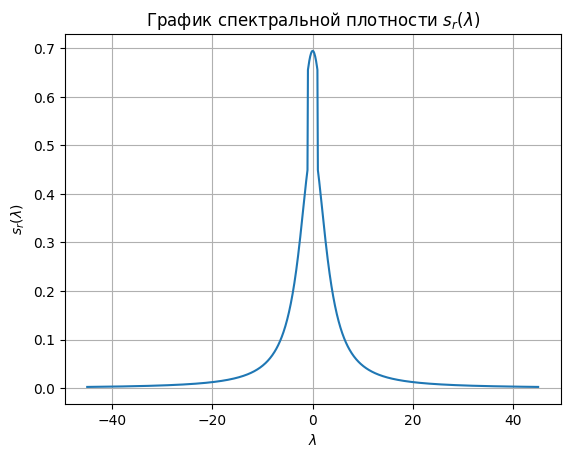

In [5]:
t = np.linspace(-45, 45, 1000)
plt.plot(t, s_r(t))
plt.xlabel('$\lambda$')
plt.ylabel('$s_r(\lambda)$')
plt.title('График спектральной плотности $s_r(\lambda)$')
plt.grid(True)
plt.show()

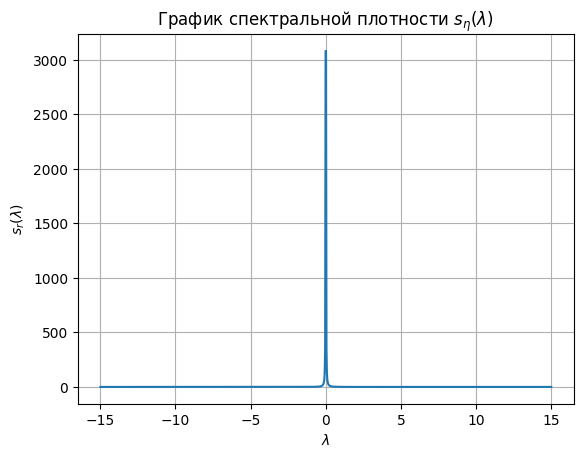

In [6]:
t = np.linspace(-15, 15, 1000)
plt.plot(t, 1/t**2*s_r(t))
plt.xlabel('$\lambda$')
plt.ylabel('$s_r(\lambda)$')
plt.title('График спектральной плотности $s_\eta(\lambda)$')
plt.grid(True)
plt.show()

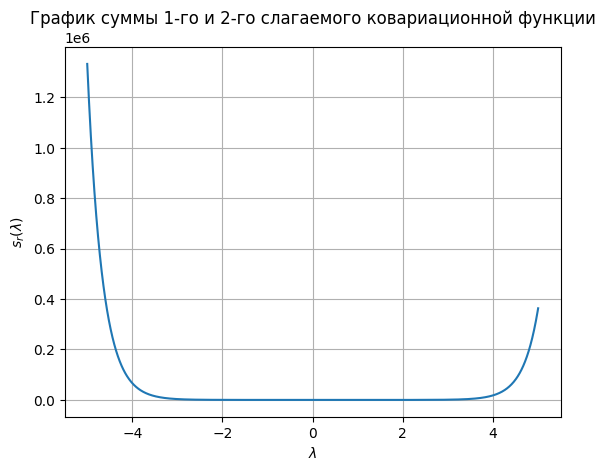

In [7]:
t = np.linspace(-5, 5, 1000)
plt.plot(t, n_1(t)+n_2(t))
plt.xlabel('$\lambda$')
plt.ylabel('$s_r(\lambda)$')
plt.title('График суммы 1-го и 2-го слагаемого ковариационной функции')
plt.grid(True)
plt.show()